## Charge libraries

In [60]:
library(tidyverse)
library(magrittr)
library(ggpubr)
library(vegan)
library(patchwork)

## Load meteor and sylph data

In [61]:
meteor <- read_csv("../data/meteor.csv", show_col_types = FALSE) # meteor data
sylph <- read_csv("../data/sylph.csv", show_col_types = FALSE) # sylph data
sylph %<>% filter(stringr::str_count(clade_name, "\\|") == 6) # same detection in taxonomy for sylph and meteor (strain level)

In [62]:
source("../scripts//helper_functions.r")

In [63]:
prune(meteor, pattern = "1_6", sd_threshold = 0.1) %>%
               {
                 X <- (t(. > 0)) * 1 
                 groups <- ifelse(grepl("ASAL", rownames(X)), "ASAL", "miG")
                 run_pcoa_analysis("jaccard", X, groups)
               } -> meteor_r
prune(sylph, pattern = "1_6", sd_threshold = 1) %>%
               {
                 X <- (t(. > 0)) * 1  
                 groups <- ifelse(grepl("ASAL", rownames(X)), "ASAL", "miG")
                 run_pcoa_analysis("jaccard", X, groups)
               } -> sylph_r

In [64]:
prune(meteor, pattern = "^ASAL[0-9]+$|^G[0-9]+$", sd_threshold = 0.1) %>%
               {
                 X <- (t(. > 0)) * 1   
                 groups <- ifelse(grepl("ASAL", rownames(X)), "ASAL", "miG")
                 run_pcoa_analysis("jaccard", X, groups)
               } -> meteor_
prune(sylph, pattern = "^ASAL[0-9]+$|^G[0-9]+$", sd_threshold = 1) %>%
               {
                 X <- (t(. > 0)) * 1    
                 groups <- ifelse(grepl("ASAL", rownames(X)), "ASAL", "miG")
                 run_pcoa_analysis("jaccard", X, groups)
               } -> sylph_
  

Saving 7 x 7 in image


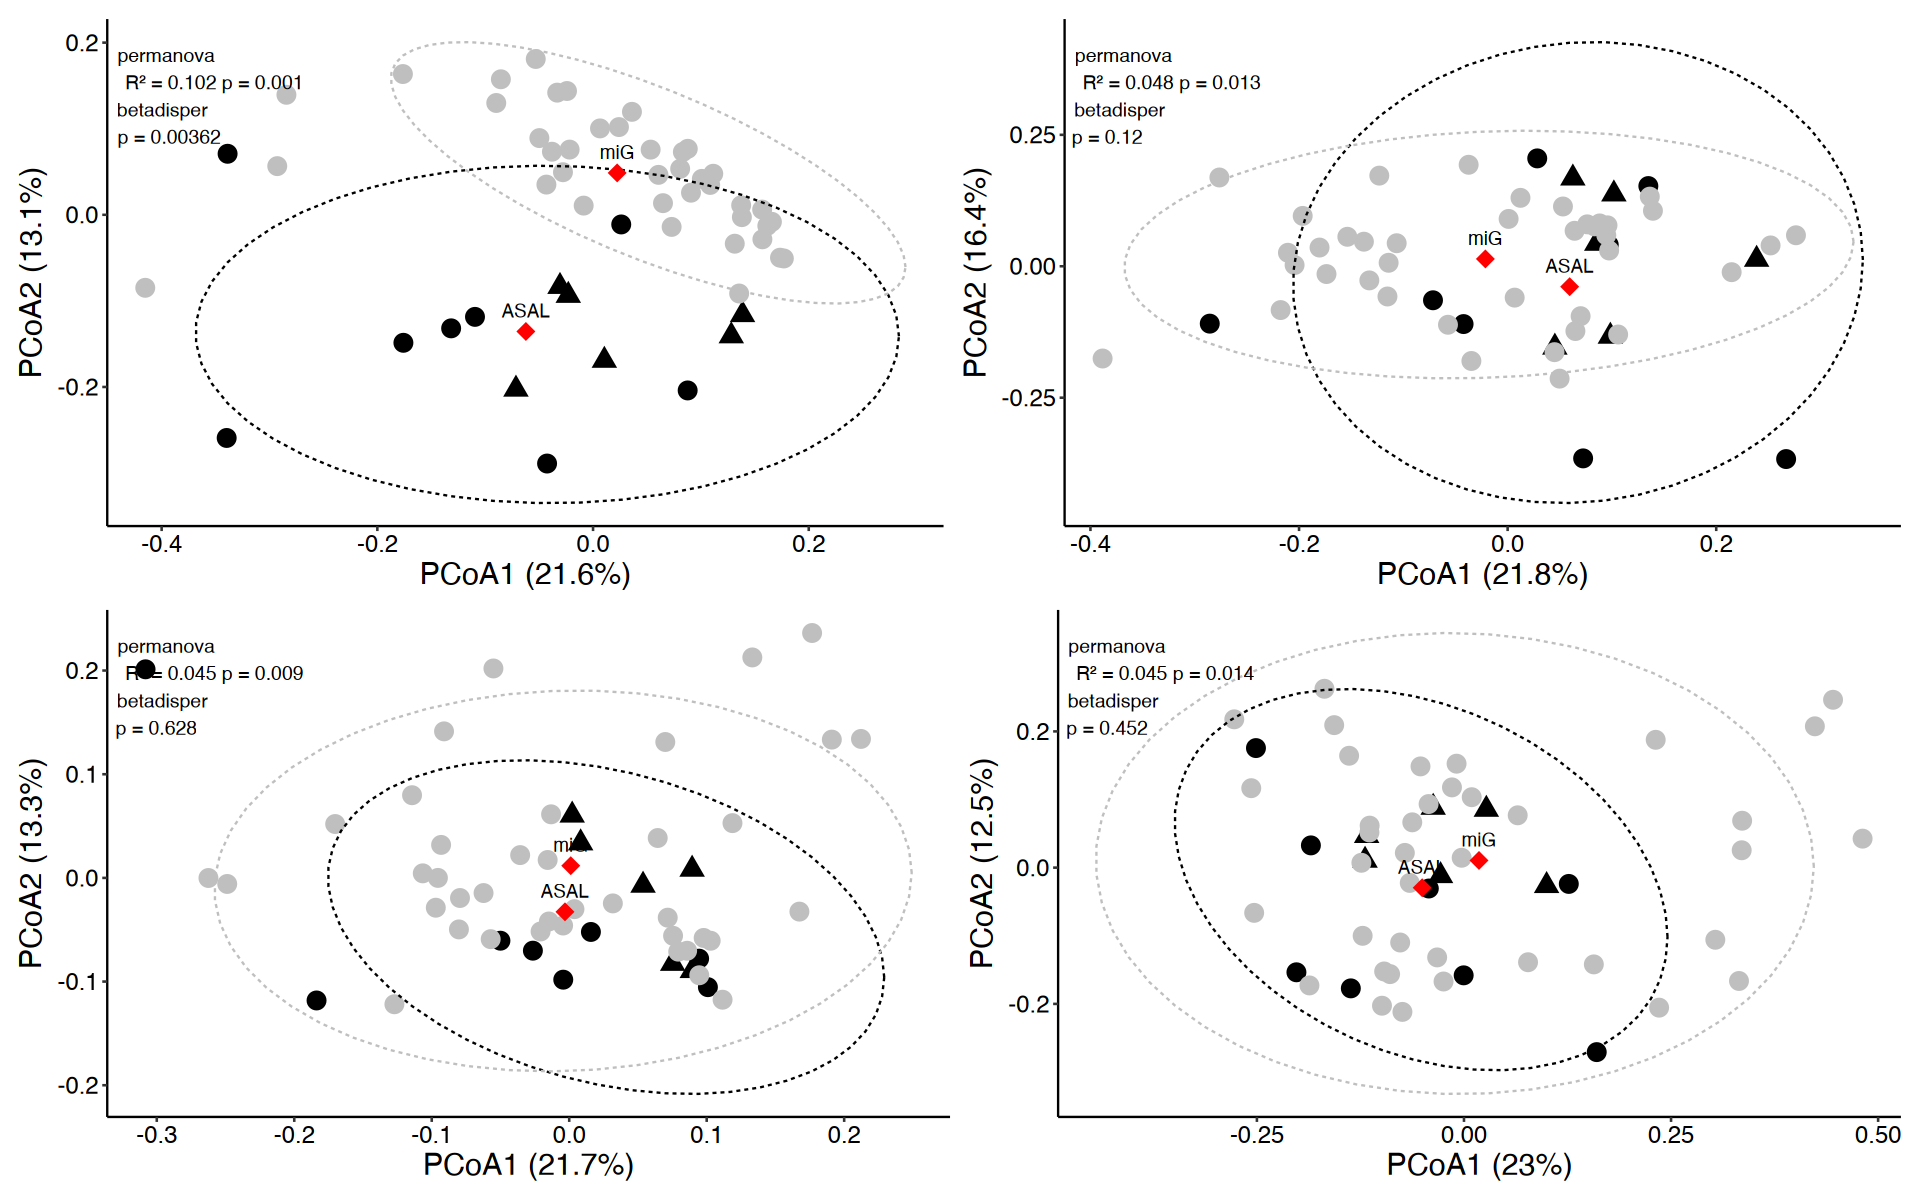

In [59]:
options(repr.plot.width=16, repr.plot.height=10)
(meteor_$plot + sylph_$plot) / (meteor_r$plot + sylph_r$plot)